# Task 2 - Prediction Using Unsupervised Machine Learning

## Done by - Jyotibrata Haldar

## Data Science and Business Analytics  Intern at Spark Foundation

## GRIPJAN21

### From the 'Iris Dataset' optimum number of cluster need to be predicted  and represented Visually

### Link for the Dataset - https://bit.ly/3kXTdox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the Iris Data Set
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* There are no Null Entries, as observed from the above table

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Inference 1

    * There are 4 features.
    * Mean are 5.84,3.05,3.75 and 1.19 for Sepal_Length, Sepal_Width, PetalLength and Petal_Width respectively.
    

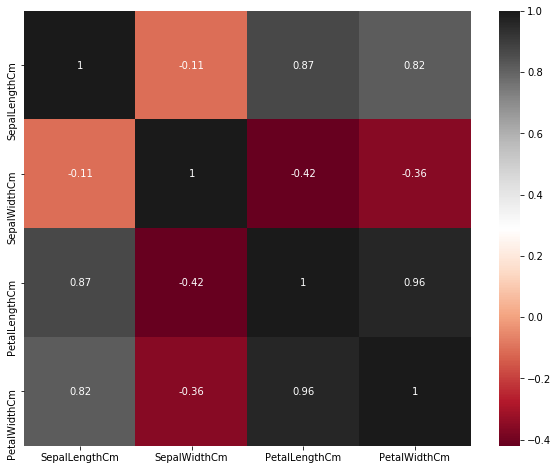

In [89]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(data.drop('Id',axis=1).corr(), annot=True, cmap='RdGy')
plt.show()

# Inference 2

    * PetalWidth is highly positively co-related to petal length and sepal length whereas medium and negative co-relation
        is seen with sepal width
    * This gives an impression that Petal_width, Petal_Length and Sepal_Length vary in similar manner whereas sepal width 
        varies in an inverse way.
    * We can use Petal_Length and Sepal_Width for our cluster prediction as negetive correlation value of sepal_width with
       petal_width is highest (-0.42) compared to sepal_length and petal_width

In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [90]:
# Seggregating the column to be clustered.
y=data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] 

In [91]:
#Standardization of the Data
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y),columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Visualizing the outliers

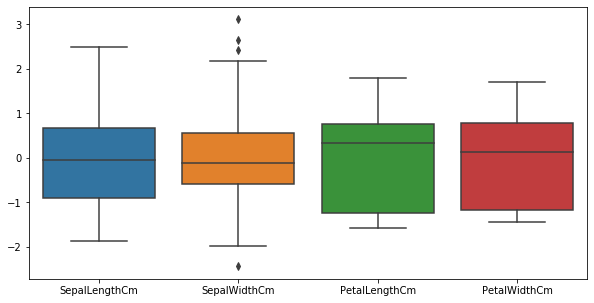

In [92]:
#Plotting the box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=y)
plt.xticks(ticks=np.arange(len(y.columns)),labels=y.columns)
plt.show()

In [93]:
Q1=y.quantile(0.25)
Q3=y.quantile(0.75)
IQR=Q3-Q1
print(IQR)

SepalLengthCm    1.575182
SepalWidthCm     1.157015
PetalLengthCm    1.990300
PetalWidthCm     1.972095
dtype: float64


In [94]:
y_outl_index=y[((y.SepalWidthCm<(Q1.SepalWidthCm-1.5*IQR.SepalWidthCm)) | (y.SepalWidthCm>(Q3.SepalWidthCm+1.5*IQR.SepalWidthCm)))].index

In [95]:
y_wo_outl_index=y[~((y.SepalWidthCm<(Q1.SepalWidthCm-1.5*IQR.SepalWidthCm)) | (y.SepalWidthCm>(Q3.SepalWidthCm+1.5*IQR.SepalWidthCm)))].index

In [96]:
y.loc[y_outl_index]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,-0.173674,3.114684,-1.284407,-1.050031
32,-0.779513,2.420475,-1.284407,-1.444450
33,-0.416010,2.651878,-1.341272,-1.312977
60,-1.021849,-2.438987,-0.147093,-0.261193


In [97]:
y.loc[y_outl_index].shape

(4, 4)

In [98]:
y=y.loc[y_wo_outl_index]

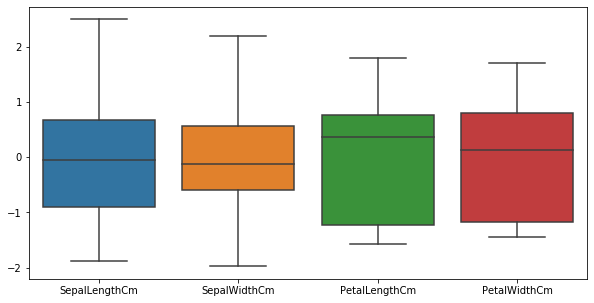

In [99]:
#Plotting the box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=y)
plt.xticks(ticks=np.arange(len(y.columns)),labels=y.columns)
plt.show()

# Inference 3

    * From the above diagram we can see that the 4 outliers have been removed.



# To identify the value of K using elbow curve

In [100]:
y1=y.copy()

# We consider only 2 features for prediction (to reduce the multi-colinearity)
y=y[['SepalWidthCm', 'PetalLengthCm']]

In [101]:
inertia_list=[]
for num_clusters in np.arange(1,10):
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(y)
    inertia_list.append(kmeans.inertia_)

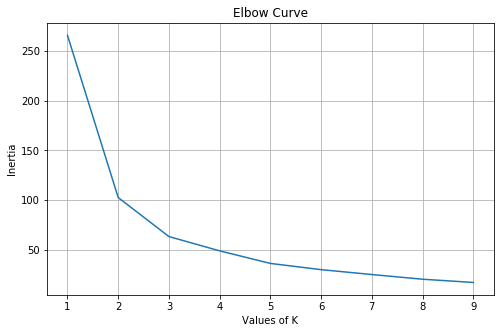

In [102]:
# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,10),inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Inference 4

* From the above we can select the value of K by determining the Elbow Point - a point after which the
    inertia starts decreasing linearly. 
* In this case, we can select the value of K =2 or K=3

In [103]:
km_2 = KMeans(n_clusters=2, init='k-means++', random_state=0)
km_3 = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [104]:
y_means_2=km_2.fit_predict(y)

In [105]:
y_means_3=km_3.fit_predict(y)

# Visualize clusters in Iris data set

## K=2

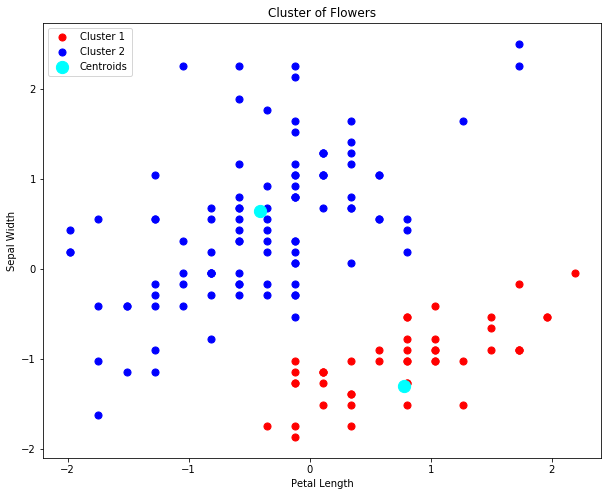

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(y1.iloc[np.where(y_means_2 == 0)]['SepalWidthCm'].values,y1.iloc[np.where(y_means_2 == 0)]['SepalLengthCm'].values,s=50,c='red',label='Cluster 1')
plt.scatter(y1.iloc[np.where(y_means_2 == 1)]['SepalWidthCm'].values,y1.iloc[np.where(y_means_2 == 1)]['SepalLengthCm'].values,s=50,c='blue',label='Cluster 2')
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:,1],s = 150, c = 'cyan', label = 'Centroids')    
plt.title('Cluster of Flowers')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

## For K=3

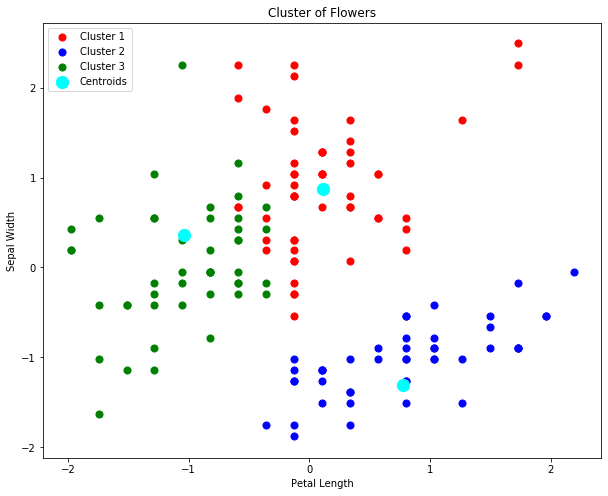

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(y1.iloc[np.where(y_means_3 == 0)]['SepalWidthCm'].values,y1.iloc[np.where(y_means_3 == 0)]['SepalLengthCm'].values,s=50,c='red',label='Cluster 1')
plt.scatter(y1.iloc[np.where(y_means_3 == 1)]['SepalWidthCm'].values,y1.iloc[np.where(y_means_3 == 1)]['SepalLengthCm'].values,s=50,c='blue',label='Cluster 2')
plt.scatter(y1.iloc[np.where(y_means_3 == 2)]['SepalWidthCm'].values,y1.iloc[np.where(y_means_3 == 2)]['SepalLengthCm'].values,s=50,c='green',label='Cluster 3')
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:,1],s = 150, c = 'cyan', label = 'Centroids')          
plt.title('Cluster of Flowers')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='best')
plt.show()

# Inference 5

    * From the above diagram we can basically conclude that there are 3 clusters, as the inertia drops below 150 and curve
      become linear